In [1]:
import sys
sys.path.append("../../src/other_methods/PMMR")
sys.path.append("../..")

import yaml
import os
import numpy as np
import matplotlib.pyplot as plt
from data_class import PVTrainDataSet, PVTestDataSet
from pmmr import PMMRModelV2
from src.generate_experiment_data import read_legalized_abortion_and_crime_dataset

In [2]:
data_path = '../../data/abortion'
return_test = False
seed = 9
W, Z, A, Y, do_A, EY_do_A = read_legalized_abortion_and_crime_dataset(data_path, return_test, seed)

train_dataset = PVTrainDataSet( treatment = A,
                                treatment_proxy = Z,
                                outcome_proxy = W,
                                outcome = Y,
                                backdoor = None)

test_dataset = PVTestDataSet(treatment = do_A,
                             structural = EY_do_A)

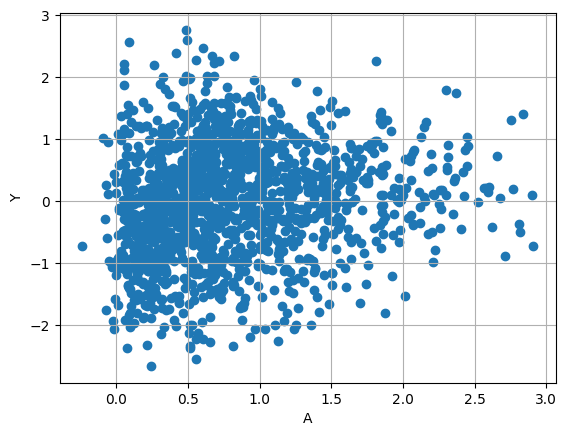

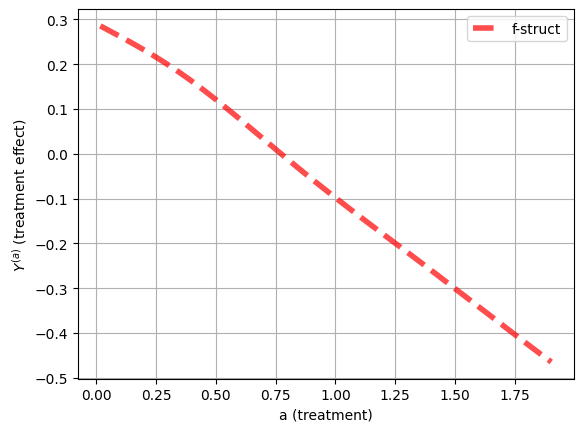

In [3]:
plt.scatter(A, Y)
plt.xlabel("A")
plt.ylabel("Y")
plt.grid()
plt.show()


plt.plot(do_A, EY_do_A, linewidth = 4, color = "red", alpha=0.7, linestyle = "dashed", label = "f-struct")
plt.grid()
plt.xlabel("a (treatment)")
plt.ylabel(r"$Y^{(a)}$ (treatment effect)")
plt.legend()

Structured function test set MSE: 0.03215968909466109
Structured function test set MAE: 0.16358205350197744


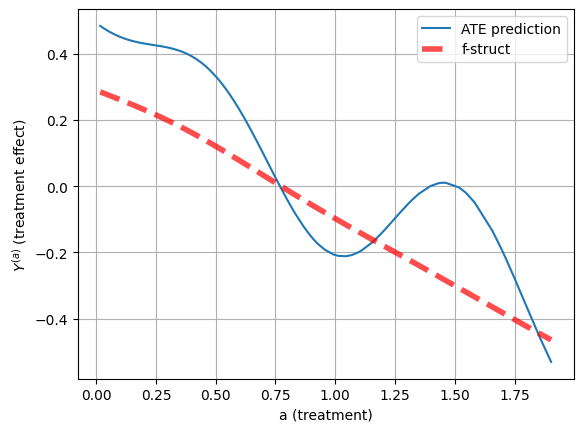

In [9]:
model = PMMRModelV2(lam1 = 1e-5, lam2 = 1e-5)

model.fit(train_dataset, "abortion_data")

f_struct_pred = model.predict(do_A)
structured_pred_mse = (np.mean((f_struct_pred.reshape(-1, 1) - EY_do_A.reshape(-1, 1)) ** 2))
structured_pred_mae = (np.mean(np.abs(f_struct_pred.reshape(-1, 1) - EY_do_A.reshape(-1, 1))))

print("Structured function test set MSE: {}".format(structured_pred_mse))
print("Structured function test set MAE: {}".format(structured_pred_mae))

plt.plot(do_A, f_struct_pred, label = "ATE prediction")
plt.plot(do_A, EY_do_A, linewidth = 4, color = "red", alpha = 0.7, linestyle = "dashed", label = "f-struct")
plt.grid()
plt.xlabel("a (treatment)")
plt.ylabel(r"$Y^{(a)}$ (treatment effect)")
plt.legend()
plt.show()